<a href="https://colab.research.google.com/github/RohanMathur17/Awesome-Jupyter-Notebooks/blob/master/Deep%20Learning/Fashion_MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [5]:
(train_images , train_labels) , (test_images , test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
               'Shirt','Sneaker','Bag','Ankle boot']

In [7]:
print(train_images.shape , train_labels.shape)

(60000, 28, 28) (60000,)


In [8]:
set(train_labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

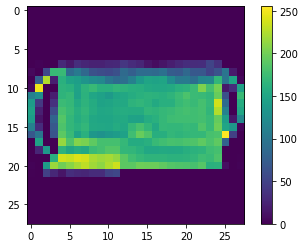

In [9]:
plt.figure()
plt.imshow(train_images[342])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#reducing pixel size to 0 - 1 and not 0 - 255

train_images = train_images / 255.0
test_images = test_images / 255.0

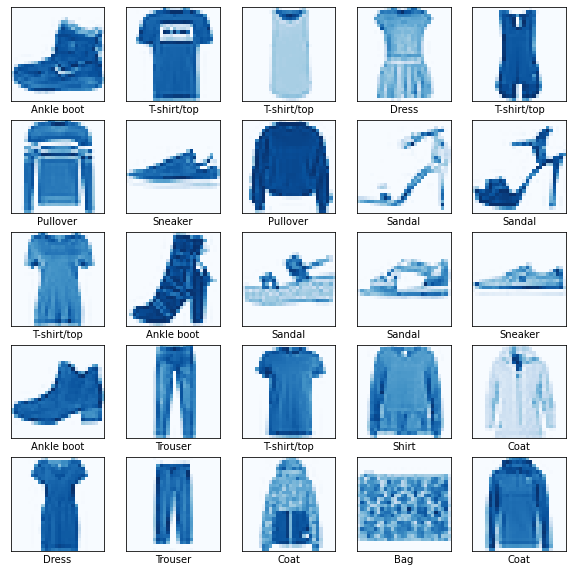

In [11]:
plt.figure( figsize = (10,10))
for i in range(25):

    plt.subplot(5, 5 ,i+1)
    plt.xticks([])
    plt.yticks([])

    plt.grid(False)

    plt.imshow(train_images[i] , cmap = plt.cm.Blues)

    plt.xlabel(class_names[train_labels[i]])

plt.show()

In [12]:
#Building the Model

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10 , activation = tf.nn.softmax)

])

In [13]:
#Compiling the model

model.compile( optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
)

In [14]:
model.fit(train_images , train_labels , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4959 - accuracy: 0.8269
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3754 - accuracy: 0.8641
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3357 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3140 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2951 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2823 - accuracy: 0.8951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.8990
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584 - accuracy: 0.9026
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2497 - accuracy: 0.9068
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

In [15]:
#Seeing how the model performs on the test data

test_loss , test_acc = model.evaluate(test_images , test_labels)

print('Test Accuracy :', test_acc)
print('Test Loss :', test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3393 - accuracy: 0.8805
Test Accuracy : 0.8805000185966492
Test Loss : 0.33925893902778625


In [16]:
predictions = model.predict(test_images)

In [17]:
np.argmax(predictions[0])   #Maximum confidence

9

In [18]:
#Plotting the confidence levels of each image for each label and showing whether they are right or wrong


def plot_image( i , predictions_array, true_label , img):

    predictions_array , true_label, img = predictions_array[i] , true_label[i] , img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img , cmap = plt.cm.Blues)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:

        color = 'blue'
    else:

        color = 'red'

    plt.xlabel(" {}  {:2.0f}% ({}) ".format(class_names[predicted_label],
                                             100*np.max(predictions_array),
                                             class_names[true_label]),
                                             color = color)
    

def plot_value_array(i , predictions_array , true_label):

    predictions_array , true_label = predictions_array[i] , true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    thisplot = plt.bar(range(10) , predictions_array , color = 'red')

    plt.ylim([0,1])

    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

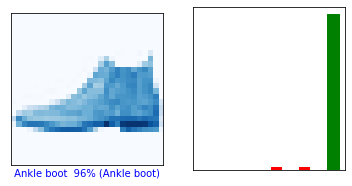

In [19]:
i = 0 
plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
plot_image(i , predictions , test_labels , test_images)
plt.subplot(1,2,2)
plot_value_array(i , predictions , test_labels)
plt.show()

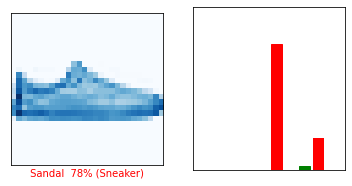

In [20]:
i = 12
plt.figure(figsize = (6,3))

plt.subplot(1,2,1)
plot_image(i , predictions , test_labels , test_images)
plt.subplot(1,2,2)
plot_value_array(i , predictions , test_labels)
plt.show()

In [22]:
img = test_images[0]
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.6626019e-06 9.1983505e-09 5.2091039e-08 9.9498489e-09 2.0301378e-07
  2.2377675e-02 3.0049112e-05 1.8308492e-02 1.8292460e-06 9.5927995e-01]]


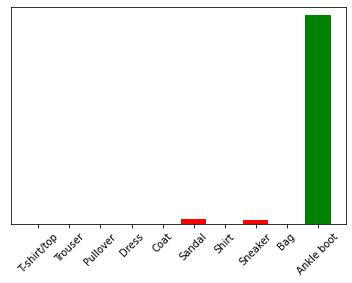

In [24]:
plot_value_array(0 , predictions_single, test_labels)
_ = plt.xticks(range(10) , class_names , rotation = 45)

#Clear that prediction single no. 9 == (ankle boot) is predicted correctly among others